In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sqlite3

In [26]:
co2 = pd.read_csv('CO2_Emissions_1960-2018.csv')
co2.head()
USA = co2[co2["Country Name"]=="United States"]
USA = USA.transpose()
USA = USA[1:]
USA.index = USA.index.astype("int64")

,251
1960,15.999779
1961,15.681256
1962,16.013937
1963,16.482762
1964,16.968119


In [24]:
atlantic = pd.read_csv('atlantic.csv')
pacific = pd.read_csv('pacific.csv')
frames = [atlantic, pacific]
hurricanes = pd.concat(frames)
by_year = hurricanes.groupby("ID")["Date"].max()
by_year_df = by_year.to_frame()

by_year_df= by_year_df.astype({"Date" : "string"})
by_year_df.Date = by_year_df.Date.str[:4]
by_year_df.head()
by_year_df.tail()

,Date
ID,
EP241990,1990
EP241992,1992
EP251992,1992
EP261992,1992
EP271992,1992


In [34]:
con = sqlite3.connect("FPA_FOD_20170508.sqlite")
# c = con.cursor()
# c.execute("SELECT name FROM sqlite_master WHERE type='table';")
# print(c.fetchall())
fires_df = pd.read_sql_query("SELECT * from Fires", con)
fires_df.head()
print(list(fires_df.columns))

['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Shape']


In [43]:
# print(list(fires_df.columns))
years = fires_df.groupby("FIRE_YEAR")["OBJECTID"].count()
fire_size = fires_df.groupby("FIRE_YEAR")["FIRE_SIZE"].mean()
fire_count_df = years.to_frame()
fire_size_df = fire_size.to_frame()
print(fire_size)

FIRE_YEAR
1992     32.364222
1993     35.356208
1994     54.198875
1995     28.676755
1996     79.460604
1997     52.313024
1998     29.414983
1999     68.039342
2000     79.234760
2001     43.009601
2002     89.923580
2003     65.682790
2004    118.855760
2005    109.082041
2006     88.097768
2007     96.946091
2008     63.324652
2009     77.333752
2010     43.728864
2011    106.277026
2012    129.724037
2013     69.350145
2014     54.218860
2015    137.174526
Name: FIRE_SIZE, dtype: float64


In [32]:
atlantic_wind = atlantic.groupby("ID")["Maximum Wind"].max()
pacific_wind = pacific.groupby("ID")["Maximum Wind"].max()

In [45]:
datasets = [fire_count_df[:2015], USA, fire_size_df]
to_analyze = pd.concat(datasets, axis=1)
to_analyze.rename(columns={'OBJECTID': 'FIRE COUNT', 251: 'AVG CO2 EMISSIONS'}, inplace=True)
to_analyze["FIRE COUNT"] = to_analyze["FIRE COUNT"]/1000
#fire count represented in thousands
print(to_analyze[0:24])

      FIRE COUNT AVG CO2 EMISSIONS   FIRE_SIZE
1992      67.975         19.025082   32.364222
1993      61.989         19.238109   35.356208
1994      75.955         19.280611   54.198875
1995      71.472         19.253938   28.676755
1996      75.574          19.61109   79.460604
1997      61.450         20.347873   52.313024
1998      68.370          20.26688   29.414983
1999      89.363          20.10572   68.039342
2000      96.416         20.471933   79.234760
2001      86.587         20.175005   43.009601
2002      75.656         19.449478   89.923580
2003      68.261         19.508705   65.682790
2004      69.279         19.603573  118.855760
2005      88.604         19.478026  109.082041
2006     114.004         18.957644   88.097768
2007      95.573         19.056027   96.946091
2008      85.378         18.294806   63.324652
2009      78.325         16.818868   77.333752
2010      79.889         17.434196   43.728864
2011      90.552         16.599404  106.277026
2012      72.

<AxesSubplot:ylabel='AVG CO2 EMISSIONS'>

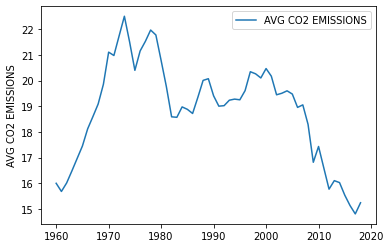

In [46]:
sns.lineplot(data=to_analyze,x=to_analyze.index,y="AVG CO2 EMISSIONS",label="AVG CO2 EMISSIONS")

<AxesSubplot:ylabel='FIRE COUNT'>

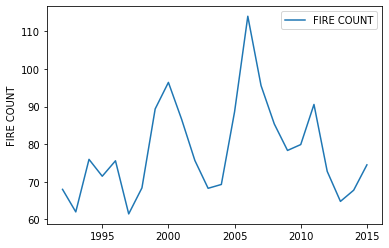

In [47]:
sns.lineplot(data=to_analyze,x=to_analyze.index,y="FIRE COUNT",label="FIRE COUNT")

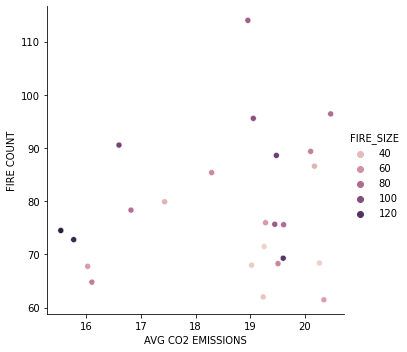

In [48]:
sns.relplot(x="AVG CO2 EMISSIONS",y="FIRE COUNT",data=to_analyze,hue='FIRE_SIZE')